# Processing Images
As far as computers are concerned, images are simply numerical data representations. You can use statistical techniques to manipulate and analyze the numerical properties of images.

# Loading and Displaying an Image
Let's start by loading a JPG file and examining its properties. Run the following cell to load and display an image using the matplotlib.image library.

numpy.ndarray

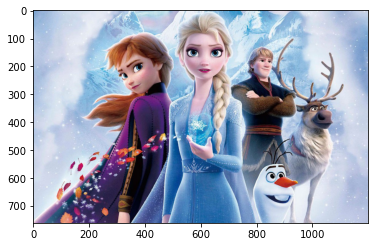

In [11]:
from matplotlib import image as mpimg
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

img1 = mpimg.imread('frozen.jpg')
plt.imshow(img1)

type(img1)

#open CV also ok

So we can see the file is definitely an image, but note that the data type of the img1 object is actually a multidimensional numpy array.

Let's take a closer look at the shape of this array:

In [12]:
img1.shape


(761, 1200, 3)

The image is actually composed of three "layers, or channels, for red, green, and blue (RGB) pixel intensities. 
#Each layer of the image represents 433 x 650 pixels (the dimensions of the image).

Now let's load and display the same image but this time we'll use another popular Python library for working with images - cv2.

numpy.ndarray

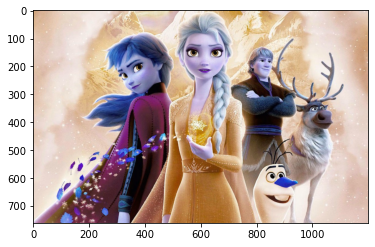

In [13]:
#pip install opencv-python
import cv2
# reads RGB as BGR

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

img2 = cv2.imread('frozen.jpg')
plt.imshow(img2)
type(img2)

Once again we've got a multidimensional array; but unless Graeme has joined the Blue Man Group (or possibly the Smurfs), there's something a bit wrong here!

The trouble is that cv2 loads the array of image data with the channels ordered as blue, green, red (BGR) instead of red, green blue (RGB). Let's fix that:

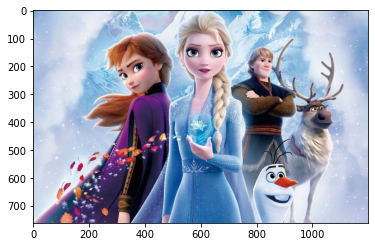

In [14]:
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

That's better - now the image is a numpy array with 3 dimensions for red, green, and blue.

There's one more commonly used library for image processing in Python we should consider - PIL:

PIL.JpegImagePlugin.JpegImageFile

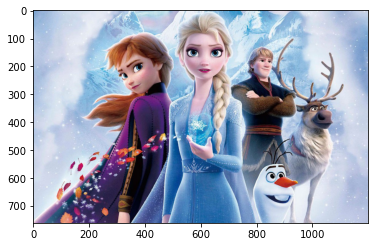

In [15]:
from PIL import Image #pillow pack
import matplotlib.pyplot as plt
%matplotlib inline

img3 = Image.open('frozen.jpg')
plt.imshow(img3)
type(img3)

This time, the data type is a JpegImageFile - not a numpy array. That's great if we only want to manipulate it using PIL methods; but sometimes we'll want to be flexible and process images using multiple libraries; so we need a consistent format.

Fortunately, it's easy to convert a PIL JpegImageFile to a numpy array:

In [16]:

import numpy as np

img3 = np.array(img3)
img3.shape

(761, 1200, 3)

So fundamentally, the common format for image libraries is a numpy array. Using this as the standard format for your image processing workflow, converting to and from other formats as required, is the best way to take advantage of the particular strengths in each library while keeping your code consistent.

You can even save a numpy array in an optimized format, should you need to persist images into storage:

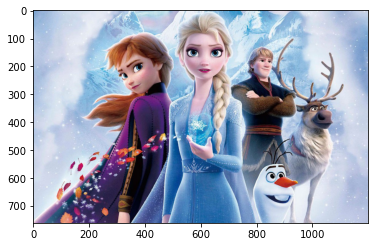

In [17]:
import numpy as np

# Save the image
np.save('img.npy', img3)

#Load the image
img3 = np.load('img.npy')

plt.imshow(img3)

# Resizing an Image
One of the most common manipulations of an image is to resize it. This can be particularly important when you're preparing multiple images to train a machine learning model, as you'll generally want to ensure that all of your training images have consistent dimensions.

Let's resize our image:

Original size: 1200 x 761
New size: 200 x 200


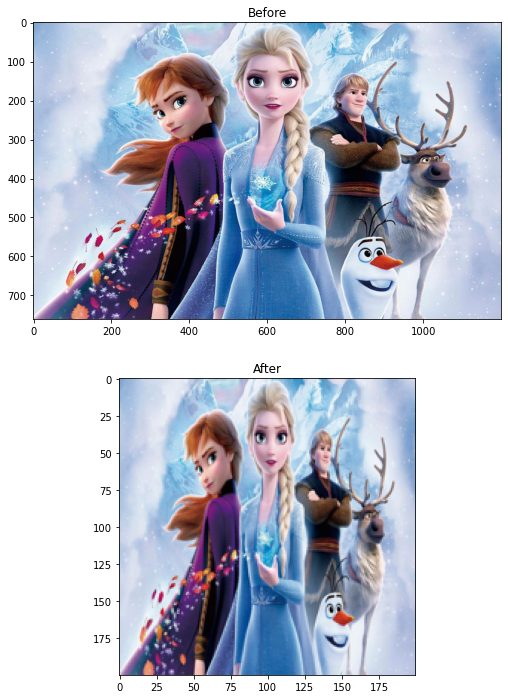

In [18]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
%matplotlib inline

# Load the image array into a PIL Image
orig_img = Image.fromarray(img3)

# Get the image size
o_h, o_w = orig_img.size
print('Original size:', o_h, 'x', o_w)

# We'll resize this so it's 200 x 200 using the thumbnail metho
target_size = (200,200)
new_img = orig_img.resize(target_size)
n_h, n_w = new_img.size
print('New size:', n_h, 'x', n_w)

# Show the original and resized images
# Create a figure
fig = plt.figure(figsize=(12, 12))

# Subplot for original image
a=fig.add_subplot(2,1,1)
imgplot = plt.imshow(orig_img)
a.set_title('Before')

# Subplot for resized image
a=fig.add_subplot(2,1,2)
imgplot = plt.imshow(new_img)
a.set_title('After')

plt.show()


Well, that worked; but notice that the image is not scaled. We resized the rectangular image to have square dimensions, and the image is skewed to fill the new size. If we want to resize the image and change its shape without distorting it, we'll need to scale the image so that its largest dimension fits our new desired size, and fill out any additional space with some sort of border.

Original size: 1200 x 761
Scaled size: 200 x 127
New size: 200 x 200


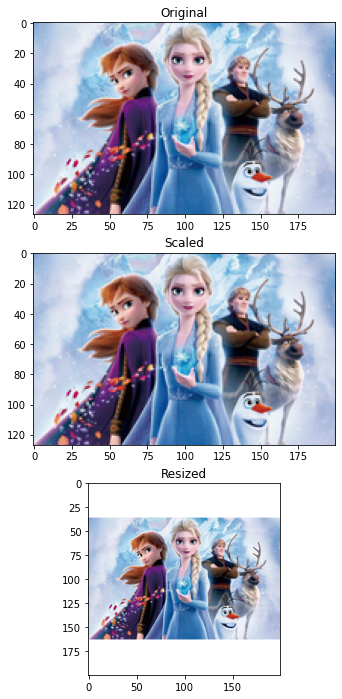

In [19]:
from PIL import Image, ImageOps

orig_img = Image.fromarray(img3)

# Get the image size
orig_height, orig_width = orig_img.size
print('Original size:', orig_height, 'x', orig_width)

# We'll resize this so it's 200 x 200
target_size = (200,200)

# Scale the image to the new size using the thumbnail method
scaled_img = orig_img
scaled_img.thumbnail(target_size, Image.ANTIALIAS)
scaled_height, scaled_width = scaled_img.size
print('Scaled size:', scaled_height, 'x', scaled_width)

# Create a new white image of the target size to be the background
new_img = Image.new("RGB", target_size, (255, 255, 255))  #white back

# paste the scaled image into the center of the white background image
new_img.paste(scaled_img, (int((target_size[0] - scaled_img.size[0]) / 2), int((target_size[1] - scaled_img.size[1]) / 2)))
new_height, new_width = new_img.size
print('New size:', new_height, 'x', new_width)

# Show the original and resized images
# Create a figure
fig = plt.figure(figsize=(12, 12))

# Subplot for original image
a=fig.add_subplot(3,1,1)
imgplot = plt.imshow(orig_img)
a.set_title('Original')

# Subplot for scaled image
a=fig.add_subplot(3,1,2)
imgplot = plt.imshow(scaled_img)
a.set_title('Scaled')

# Subplot for resized image
a=fig.add_subplot(3,1,3)
imgplot = plt.imshow(new_img)
a.set_title('Resized')

plt.show()

# Examining Numerical Properties of the Image Array


So we've seen that an image is inherently an array of values. Let's examine that in more detail. What type of values are in the array?



In [20]:
img3.dtype


dtype('uint8')

OK, so the array consists of 8-bit integer values. In other words, whole numbers between 0 and 255. These represent the possible pixel intensities for the RGB color channels in each pixel of the image.

Let's look at the distribution of pixel values in the image. Ideally, the image should have relatively even distribution of values, indicating good contrast and making it easier to extract analytical information.

An easy way to check this is to plot a histogram.

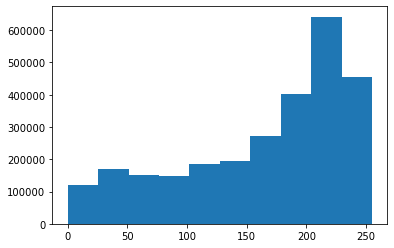

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot a histogram - we need to use ravel to "flatten" the 3 dimensions
plt.hist(img3.ravel())
plt.show()


Another useful way to visualize the statistics of an image is as a cumulative distribution function (CDF) plot. Which shows the cumulative pixel intensity frequencies from 0 to 255.

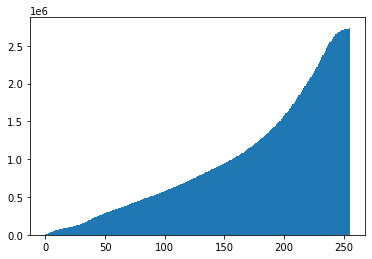

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(img3.ravel(), bins=255, cumulative=True)
plt.show()


The histogram and CDF for our image show pretty uneven distribution - there's a lot of contrast in the image. Ideally we should equalize the values in the images we want to analyse to try to make our images more consistent in terms of the shapes they contain irrespective of light levels.

Histogram equalization is often used to improve the statistics of images. In simple terms, the histogram equalization algorithm attempts to adjust the pixel values in the image to create a more uniform distribution. The code in the cell below uses the exposure.equalize_hist method from the skimage package to equalize the image.

C:\Users\Asus\anaconda3\lib\site-packages\skimage\exposure\exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


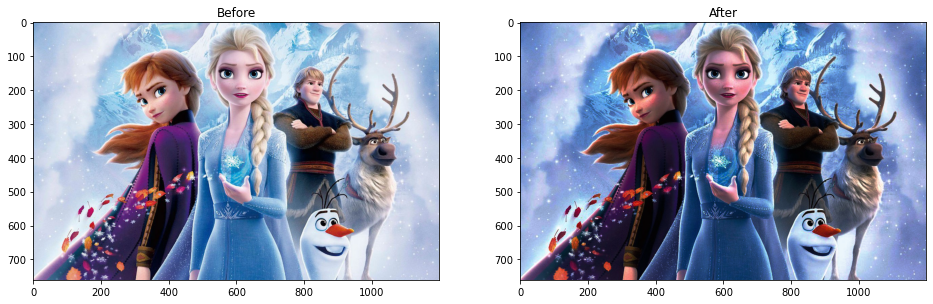

In [23]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import exposure
%matplotlib inline

img3_eq = exposure.equalize_hist(img3)

# Display using matplotlib

# Create a figure
fig = plt.figure(figsize=(16, 8))

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(img3)
a.set_title('Before')

# Subplot for processed image
a=fig.add_subplot(1,2,2)
imgplot = plt.imshow(img3_eq)
a.set_title('After')

plt.show()


As with most image operations, there's more than one way to do this. For example, you could also use the PIL.ImgOps.equalize method:



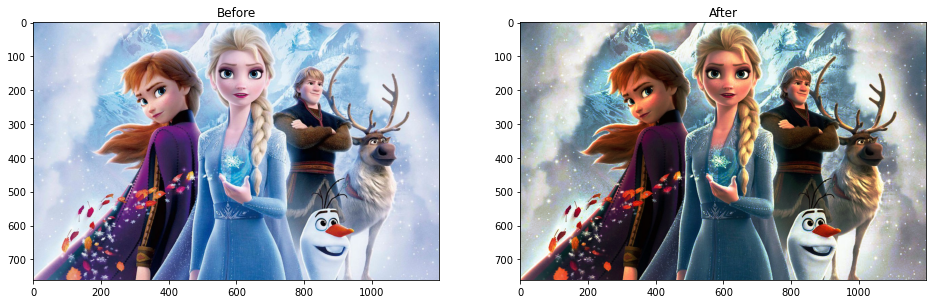

In [24]:
from PIL import Image, ImageOps
%matplotlib inline

# Equalize the image - but we need to convert the numpy array back to the PIL image format
img3PIL_eq = ImageOps.equalize(Image.fromarray(img3))

# Display using matplotlib

# Create a figure
fig = plt.figure(figsize=(16, 8))

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(img3)
a.set_title('Before')

# Subplot for processed image
a=fig.add_subplot(1,2,2)
imgplot = plt.imshow(img3PIL_eq)
a.set_title('After')

plt.show()

Now let's see what that's done to the histogram and CDF plots:



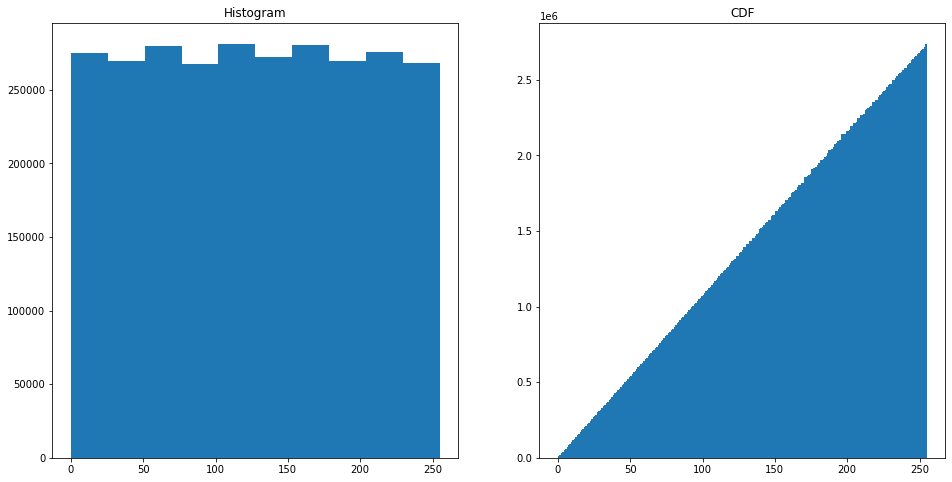

In [25]:
# Display histograms
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
%matplotlib inline

img3_eq = np.array(img3PIL_eq)

# Create a figure
fig = plt.figure(figsize=(16, 8))

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.hist(img3_eq.ravel())
a.set_title('Histogram')

# Subplot for processed image
a=fig.add_subplot(1,2,2)
imgplot = plt.hist(img3_eq.ravel(), bins=255, cumulative=True)
a.set_title('CDF')

plt.show()

#smoothing

The pixel intensities are more evenly distributed in the equalized image. In particular, the cumulative density shows a straight diagonal cumulation; which is a good sign that the pixel intensity values have been equalized.

# Denoising with Filters
Often images need to be cleaned up to remove "salt and pepper" noise.

# Add Some Random Noise
Let's add some random noise to our image - such as you might see in a photograph taken in low light or at a low resolution.

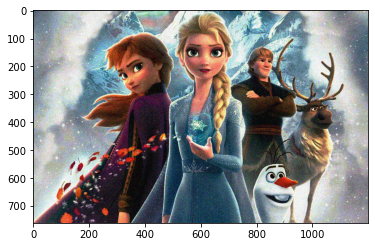

In [26]:
import skimage
%matplotlib inline

img3_n = skimage.util.random_noise(img3_eq)
plt.imshow(img3_n)

# Using a Gaussian Filter
A Gaussian filter applies a weighted average (mean) value for pixels based on the pixels that surround them.

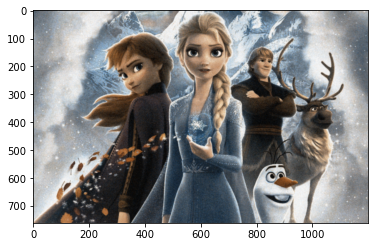

In [27]:
from scipy.ndimage.filters import gaussian_filter as gauss
%matplotlib inline

img3_gauss = gauss(img3_n, sigma=1)   
plt.imshow(img3_gauss)

# Using a Median Filter
The Gaussian filter results in a blurred image, which may actually be better for feature extraction as it makes it easier to find contrasting areas. If it's too blurred, we could try a median filter, which as the name suggests applies the median value to pixels based on the pixels around them.

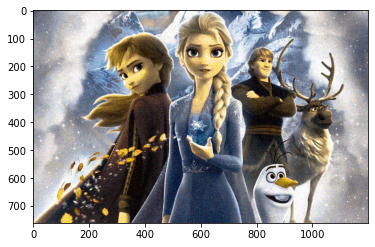

In [28]:

from scipy.ndimage.filters import median_filter as med
%matplotlib inline

img3_med = med(img3_n, size=2)
plt.imshow(img3_med)

# Extract Features
Now that we've done some initial processing of the image to improve its statistics for analysis, we can start to extract features from it.

# Sobel Edge Detection
As a first step in extracting features, you will apply the Sobel edge detection algorithm. This finds regions of the image with large gradient values in multiple directions. Regions with high omnidirectional gradient are likely to be edges or transitions in the pixel values.

The code in the cell below applies the Sobel algorithm to the median filtered image, using these steps:

1.Convert the color image to grayscale for the gradient calculation since it is two dimensional.
2.Compute the gradient in the x and y (horizontal and vertical) directions.
3.Compute the magnitude of the gradient.
4.Normalize the gradient values.

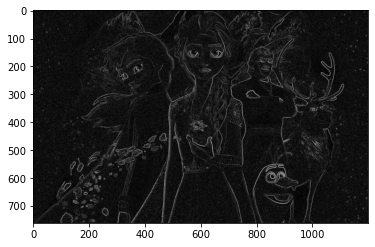

In [30]:

def edge_sobel(image):
    from scipy import ndimage
    import skimage.color as sc
    import numpy as np
    image = sc.rgb2gray(image) # Convert color image to gray scale
    dx = ndimage.sobel(image, 1)  # horizontal derivative
    dy = ndimage.sobel(image, 0)  # vertical derivative
    mag = np.hypot(dx, dy)  # magnitude
    mag *= 255.0 / np.amax(mag)  # normalize (Q&D)
    mag = mag.astype(np.uint8)
    return mag

img3_edge = edge_sobel(img3_med)
plt.imshow(img3_edge, cmap="gray")


#highlight the edges

Now let's try with the more blurred gaussian filtered image.



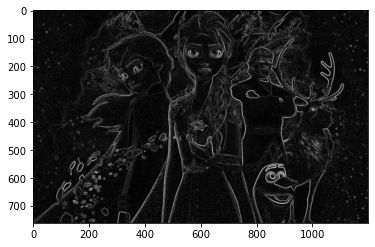

In [31]:
img3_edge = edge_sobel(img3_gauss)
plt.imshow(img3_edge, cmap="gray")

Note that the lines are more pronounced. Although a gaussian filter makes the image blurred to human eyes, this blurring can actually help accentuate contrasting features for computer processing.

# Harris Corner Detection
Another example of a feature extraction algorithm is corner detection. In simple terms, the Harris corner detection algorithm locates regions of the image with large changes in pixel values in all directions. These regions are said to be corners. The Harris corner detector is paired with the corner_peaks method. This operator filters the output of the Harris algorithm, over a patch of the image defined by the span of the filters, for the most likely corners.

[[ 680  208]
 [ 681  146]
 [ 561  869]
 [ 576  834]
 [ 146  663]
 [ 469  896]
 [ 559  306]
 [ 203  369]
 [ 455  639]
 [ 505  400]
 [ 351 1007]
 [ 619  135]
 [ 447  552]
 [ 431  608]
 [ 182  817]
 [ 600  883]
 [ 402  596]
 [ 315  883]
 [ 583  281]
 [ 596  237]
 [ 465  471]
 [ 652  186]
 [ 347 1029]
 [ 555  146]
 [ 425  581]
 [ 152  589]
 [ 293  768]
 [ 228  323]
 [ 441  471]
 [ 146  565]
 [ 559  542]
 [ 333  983]
 [ 482  286]
 [ 184  842]
 [ 454  513]
 [ 708  257]
 [ 617  198]
 [ 589  861]
 [ 285  932]
 [ 365  724]
 [ 530  201]
 [ 554  196]
 [ 589  136]
 [ 734  261]
 [  64  771]
 [ 315 1086]
 [ 519  330]
 [ 275  894]
 [ 224 1033]
 [ 559  478]
 [ 650  146]
 [ 635  105]
 [ 411  490]
 [ 241  839]
 [ 214  609]
 [ 184 1035]
 [  28  344]
 [ 422 1086]
 [ 154 1061]
 [ 415  742]
 [ 204 1067]
 [  20  733]
 [ 339  942]
 [ 364  964]
 [ 426 1041]
 [ 608  444]
 [ 104  933]
 [ 617  947]
 [ 563  625]
 [ 532  249]
 [ 736  138]
 [ 430  660]
 [ 519  647]
 [ 264 1110]
 [ 486  615]
 [ 215  636]
 [ 702  391]

'Done'

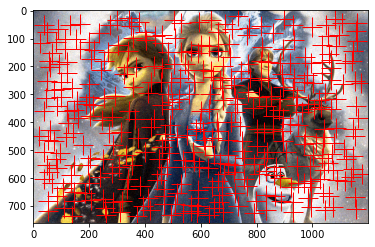

In [33]:
# Function to apply the Harris corner-detection algorithm to an image
def corner_harr(im, min_distance = 20):
    import skimage.color as sc
    from skimage.feature import corner_harris, corner_peaks
    
    im = sc.rgb2gray(im) # Convert color image to gray scale
    mag = corner_harris(im)
    return corner_peaks(mag, min_distance = min_distance)

# Find the corners in the median filtered image with a minimum distance of 20 pixels
harris = corner_harr(img3_med, 20)

print (harris)

# Function to plot the image with the harris corners marked on it
def plot_harris(im, harris, markersize = 20, color = 'red'):
    import matplotlib.pyplot as plt
    import numpy as np
    fig = plt.figure(figsize=(6, 6))
    fig.clf()
    ax = fig.gca()    
    ax.imshow(np.array(im).astype(float), cmap="gray")
    ax.plot(harris[:, 1], harris[:, 0], 'r+', color = color, markersize=markersize)
    return 'Done'  

plot_harris(img3_med, harris)

The corner detection algorithm has identified the eyes in the image.

